# Data Exploration and Cleaning

This notebook performs exploratory data analysis (EDA) on the marine engine fault dataset.

**Objectives:**
- Load and profile the dataset
- Check for missing values and data types
- Visualize fault label distribution
- Analyze sensor feature distributions
- Identify outliers
- Document cleaning decisions

## Version 2.0 - Performance Improvements

### Changes in v2.0:
- Added correlation heatmap for 18 sensor features
- Added feature distribution analysis (top 5 sensors)
- Added outlier detection summary using IQR method
- Enhanced visualizations with proper sizing and labels

### Backward Compatibility:
- All original cells preserved and functional
- New functionality added as additional cells
- Existing variable names unchanged


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 1. Load Dataset

In [2]:
# Load the marine engine fault dataset
df = pd.read_csv('../data/marine_engine_fault_dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total records: {len(df):,}")
print(f"Total features: {df.shape[1]}")

Dataset shape: (10000, 20)
Total records: 10,000
Total features: 20


In [3]:
# Display first few rows
df.head()

,Timestamp,Shaft_RPM,Engine_Load,Fuel_Flow,Air_Pressure,Ambient_Temp,Oil_Temp,Oil_Pressure,Vibration_X,Vibration_Y,Vibration_Z,Fault_Label,Cylinder1_Pressure,Cylinder1_Exhaust_Temp,Cylinder2_Pressure,Cylinder2_Exhaust_Temp,Cylinder3_Pressure,Cylinder3_Exhaust_Temp,Cylinder4_Pressure,Cylinder4_Exhaust_Temp
0,2024-01-01 00:00:00,965.414073,72.397307,114.665107,1.025896,27.055404,73.000474,3.407503,0.087248,0.076305,0.069988,0,157.710104,418.761079,139.335694,449.428109,151.140472,400.142839,138.194303,469.788241
1,2024-01-01 00:00:01,996.888052,90.818713,156.425262,1.258291,26.686902,77.039208,2.935203,0.035802,0.066677,0.077774,0,163.301036,416.912327,151.742643,383.042000,147.326823,400.557809,131.104323,430.206873
2,2024-01-01 00:00:02,948.424675,76.358257,126.188656,1.184234,25.482428,79.076912,3.942825,0.102402,0.047158,0.046104,0,148.868866,455.707882,155.441964,374.099103,131.471313,455.522306,143.895843,417.453433
3,2024-01-01 00:00:03,982.370968,63.822324,107.840402,1.150488,24.372997,78.028895,3.893302,0.065176,0.067617,0.041622,0,142.861369,464.990838,137.514280,407.003480,154.426397,423.237676,145.149830,383.834081
4,2024-01-01 00:00:04,973.166374,69.483056,113.637069,1.174918,30.678317,78.353818,3.518891,0.047297,0.085649,0.093252,0,138.080575,407.992398,144.795201,482.424962,152.438065,427.269295,162.077661,450.501985


## 2. Dataset Profiling

In [4]:
# Check data types
print("Data Types:")
print(df.dtypes)

Data Types:
Timestamp                  object
Shaft_RPM                 float64
Engine_Load               float64
Fuel_Flow                 float64
Air_Pressure              float64
Ambient_Temp              float64
Oil_Temp                  float64
Oil_Pressure              float64
Vibration_X               float64
Vibration_Y               float64
Vibration_Z               float64
Fault_Label                 int64
Cylinder1_Pressure        float64
Cylinder1_Exhaust_Temp    float64
Cylinder2_Pressure        float64
Cylinder2_Exhaust_Temp    float64
Cylinder3_Pressure        float64
Cylinder3_Exhaust_Temp    float64
Cylinder4_Pressure        float64
Cylinder4_Exhaust_Temp    float64
dtype: object


In [5]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("\n✓ No missing values found in the dataset!")

Missing Values:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

✓ No missing values found in the dataset!


In [6]:
# Check unique counts for all columns
print("Unique Value Counts:")
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)

Unique Value Counts:
Timestamp                 10000
Shaft_RPM                 10000
Engine_Load               10000
Fuel_Flow                 10000
Air_Pressure              10000
Ambient_Temp              10000
Oil_Temp                  10000
Oil_Pressure              10000
Vibration_X               10000
Vibration_Y               10000
Vibration_Z               10000
Cylinder1_Pressure        10000
Cylinder3_Pressure        10000
Cylinder1_Exhaust_Temp    10000
Cylinder2_Pressure        10000
Cylinder2_Exhaust_Temp    10000
Cylinder4_Pressure        10000
Cylinder3_Exhaust_Temp    10000
Cylinder4_Exhaust_Temp    10000
Fault_Label                   8
dtype: int64


In [7]:
# Statistical summary
df.describe()

,Shaft_RPM,Engine_Load,Fuel_Flow,Air_Pressure,Ambient_Temp,Oil_Temp,Oil_Pressure,Vibration_X,Vibration_Y,Vibration_Z,Fault_Label,Cylinder1_Pressure,Cylinder1_Exhaust_Temp,Cylinder2_Pressure,Cylinder2_Exhaust_Temp,Cylinder3_Pressure,Cylinder3_Exhaust_Temp,Cylinder4_Pressure,Cylinder4_Exhaust_Temp
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,949.921426,69.892484,129.156885,1.172355,28.011995,80.729227,3.352399,0.064142,0.064168,0.079999,1.399500,144.716205,422.137856,144.659872,422.978618,144.701544,422.700867,144.653735,421.617403
std,49.660178,9.985785,15.740054,0.150844,3.029667,6.019161,0.612317,0.067868,0.067376,0.090732,2.249846,10.329856,33.487171,10.478875,33.907090,10.427467,34.053003,10.445532,33.508899
min,752.332104,26.540143,63.672329,0.302520,16.784070,60.623924,0.443906,-0.023978,-0.033324,-0.018706,0.000000,89.665022,299.932829,94.467216,316.730640,88.421228,309.776683,86.986045,313.481216
25%,915.852925,63.307298,118.949072,1.116794,25.930773,76.791849,3.119503,0.037422,0.036871,0.047319,0.000000,137.898880,400.379389,137.940964,400.654386,138.023255,400.628794,138.019604,399.769628
50%,950.159241,69.873996,129.391549,1.192006,28.042187,80.260837,3.451340,0.051181,0.051511,0.061298,0.000000,144.910905,420.411210,144.844867,420.927644,144.926535,421.117851,144.804832,420.409887
75%,984.216907,76.624104,139.847308,1.261663,30.058147,83.964869,3.733336,0.065530,0.065782,0.075946,2.000000,151.582568,441.874880,151.739133,442.206186,151.702872,442.553016,151.627509,440.922021
max,1146.409054,105.459305,183.335311,1.591839,39.017917,112.625196,5.056678,0.487814,0.483689,0.589218,7.000000,184.218612,612.584935,182.874316,592.000645,181.399877,604.793168,185.698499,611.916403


## 3. Fault Label Distribution Analysis

In [8]:
# Define fault label mapping
FAULT_LABELS = {
    0: "Normal",
    1: "Fuel Injection Fault",
    2: "Cooling System Fault",
    3: "Turbocharger Fault",
    4: "Bearing Wear",
    5: "Lubrication Oil Degradation",
    6: "Air Intake Restriction",
    7: "Vibration Anomaly"
}

# Count distribution
fault_counts = df['Fault_Label'].value_counts().sort_index()
fault_percentages = (fault_counts / len(df)) * 100

print("Fault Label Distribution:")
for label, count in fault_counts.items():
    print(f"{label} - {FAULT_LABELS[label]}: {count:,} ({fault_percentages[label]:.2f}%)")

Fault Label Distribution:
0 - Normal: 6,507 (65.07%)
1 - Fuel Injection Fault: 509 (5.09%)
2 - Cooling System Fault: 498 (4.98%)
3 - Turbocharger Fault: 488 (4.88%)
4 - Bearing Wear: 481 (4.81%)
5 - Lubrication Oil Degradation: 499 (4.99%)
6 - Air Intake Restriction: 519 (5.19%)
7 - Vibration Anomaly: 499 (4.99%)


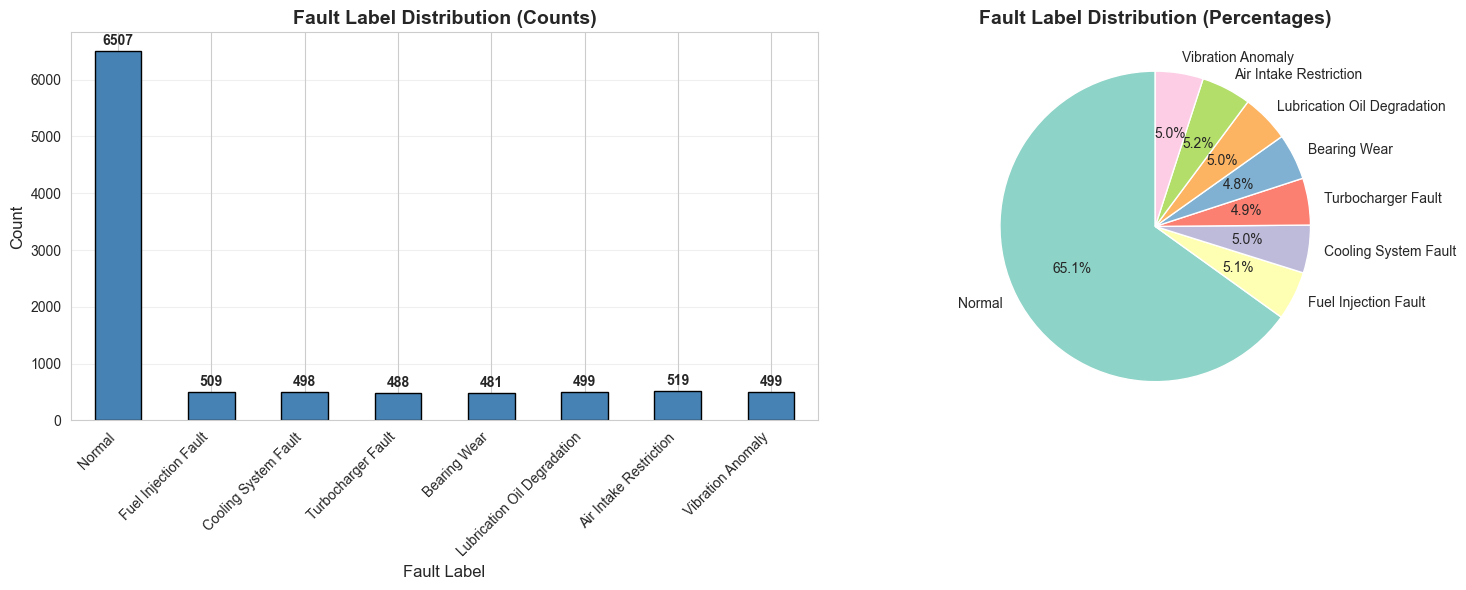


Class Balance Analysis:
Most common class: 65.07%
Least common class: 4.81%
Imbalance ratio: 13.53x
⚠ Dataset shows class imbalance - consider stratified sampling


In [9]:
# Visualize fault label distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart with counts
fault_counts.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Fault Label Distribution (Counts)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Fault Label', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels([FAULT_LABELS[i] for i in range(8)], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(fault_counts):
    ax1.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart with percentages
colors = plt.cm.Set3(range(8))
ax2.pie(fault_counts, labels=[FAULT_LABELS[i] for i in range(8)], autopct='%1.1f%%',
        startangle=90, colors=colors)
ax2.set_title('Fault Label Distribution (Percentages)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Check for class imbalance
max_class = fault_percentages.max()
min_class = fault_percentages.min()
imbalance_ratio = max_class / min_class

print(f"\nClass Balance Analysis:")
print(f"Most common class: {max_class:.2f}%")
print(f"Least common class: {min_class:.2f}%")
print(f"Imbalance ratio: {imbalance_ratio:.2f}x")

if imbalance_ratio < 2:
    print("✓ Dataset is well-balanced!")
else:
    print("⚠ Dataset shows class imbalance - consider stratified sampling")

## 4. Sensor Feature Analysis

Analyzing the 18 sensor features to understand their distributions and identify potential issues.

In [10]:
# Define sensor feature columns (excluding Timestamp and Fault_Label)
sensor_features = [
    'Shaft_RPM', 'Engine_Load', 'Fuel_Flow', 'Air_Pressure', 'Ambient_Temp',
    'Oil_Temp', 'Oil_Pressure', 'Vibration_X', 'Vibration_Y', 'Vibration_Z',
    'Cylinder1_Pressure', 'Cylinder1_Exhaust_Temp',
    'Cylinder2_Pressure', 'Cylinder2_Exhaust_Temp',
    'Cylinder3_Pressure', 'Cylinder3_Exhaust_Temp',
    'Cylinder4_Pressure', 'Cylinder4_Exhaust_Temp'
]

print(f"Total sensor features: {len(sensor_features)}")
print(f"Features: {sensor_features}")

Total sensor features: 18
Features: ['Shaft_RPM', 'Engine_Load', 'Fuel_Flow', 'Air_Pressure', 'Ambient_Temp', 'Oil_Temp', 'Oil_Pressure', 'Vibration_X', 'Vibration_Y', 'Vibration_Z', 'Cylinder1_Pressure', 'Cylinder1_Exhaust_Temp', 'Cylinder2_Pressure', 'Cylinder2_Exhaust_Temp', 'Cylinder3_Pressure', 'Cylinder3_Exhaust_Temp', 'Cylinder4_Pressure', 'Cylinder4_Exhaust_Temp']


### 4.1 Histograms for All Sensor Features

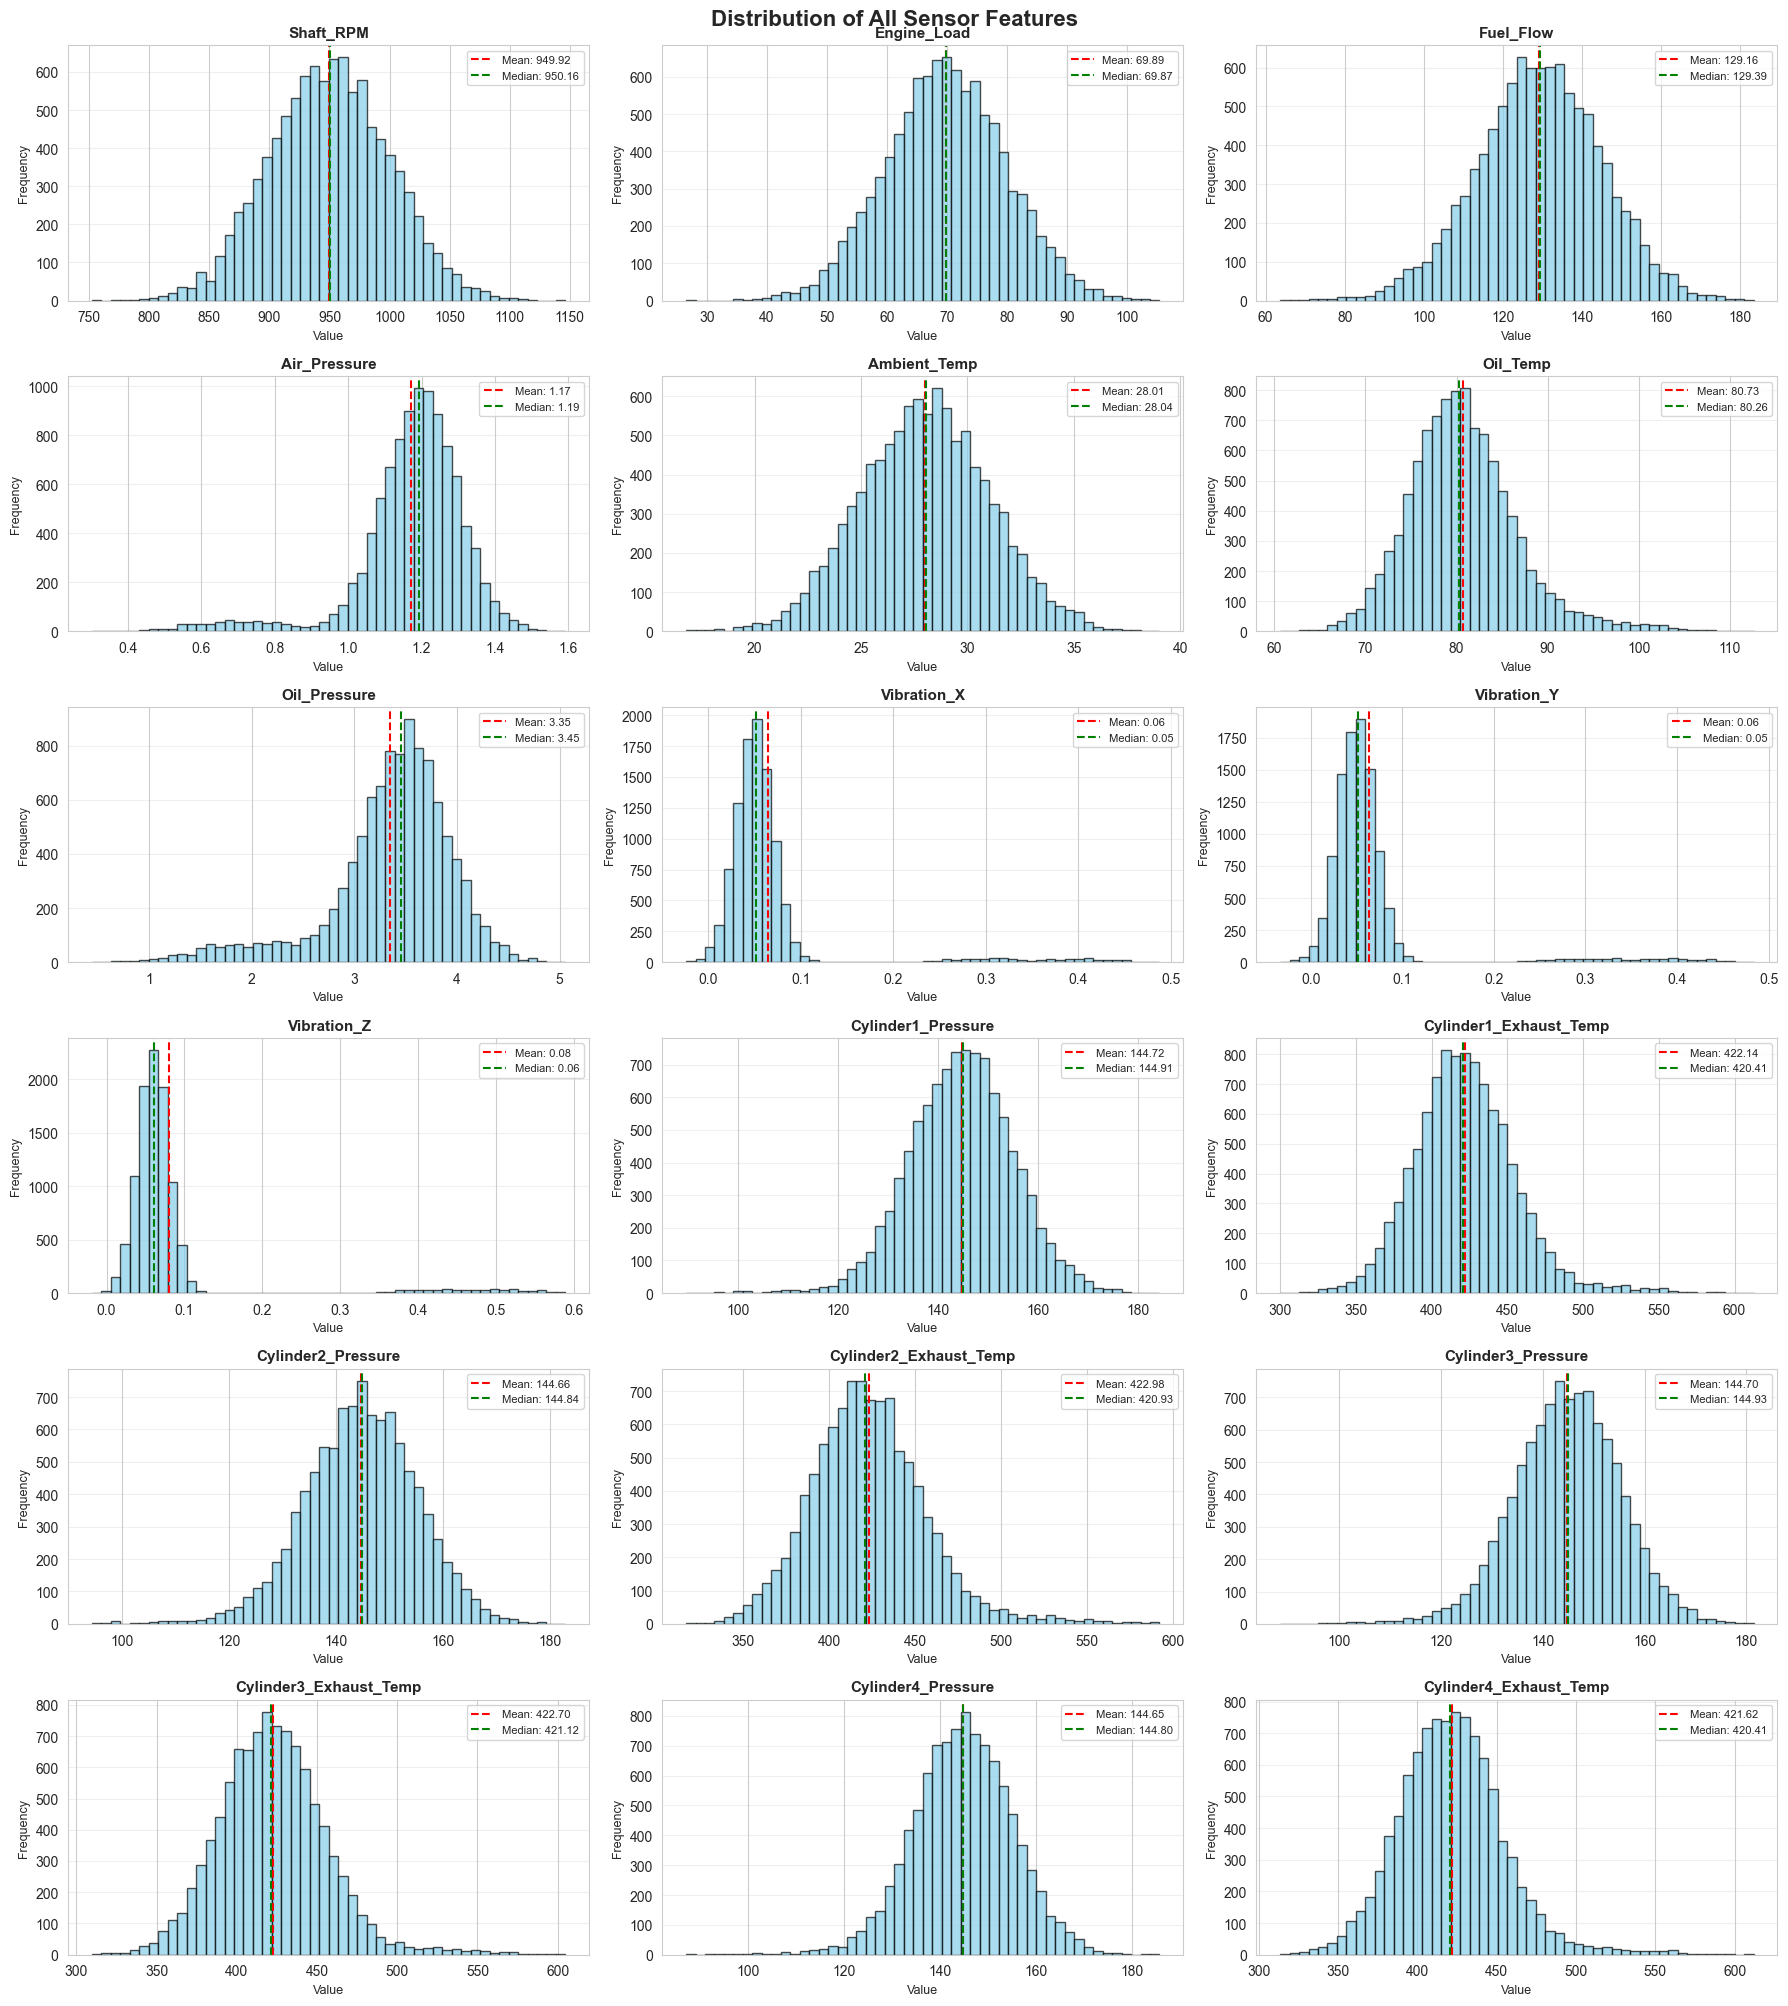

In [11]:
# Generate histograms for all 18 sensor features
fig, axes = plt.subplots(6, 3, figsize=(18, 20))
axes = axes.flatten()

for idx, feature in enumerate(sensor_features):
    ax = axes[idx]
    df[feature].hist(bins=50, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Value', fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    
    # Add mean and median lines
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_val:.2f}')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.suptitle('Distribution of All Sensor Features', fontsize=16, fontweight='bold', y=1.001)
plt.show()

### 4.2 Boxplots to Identify Outliers

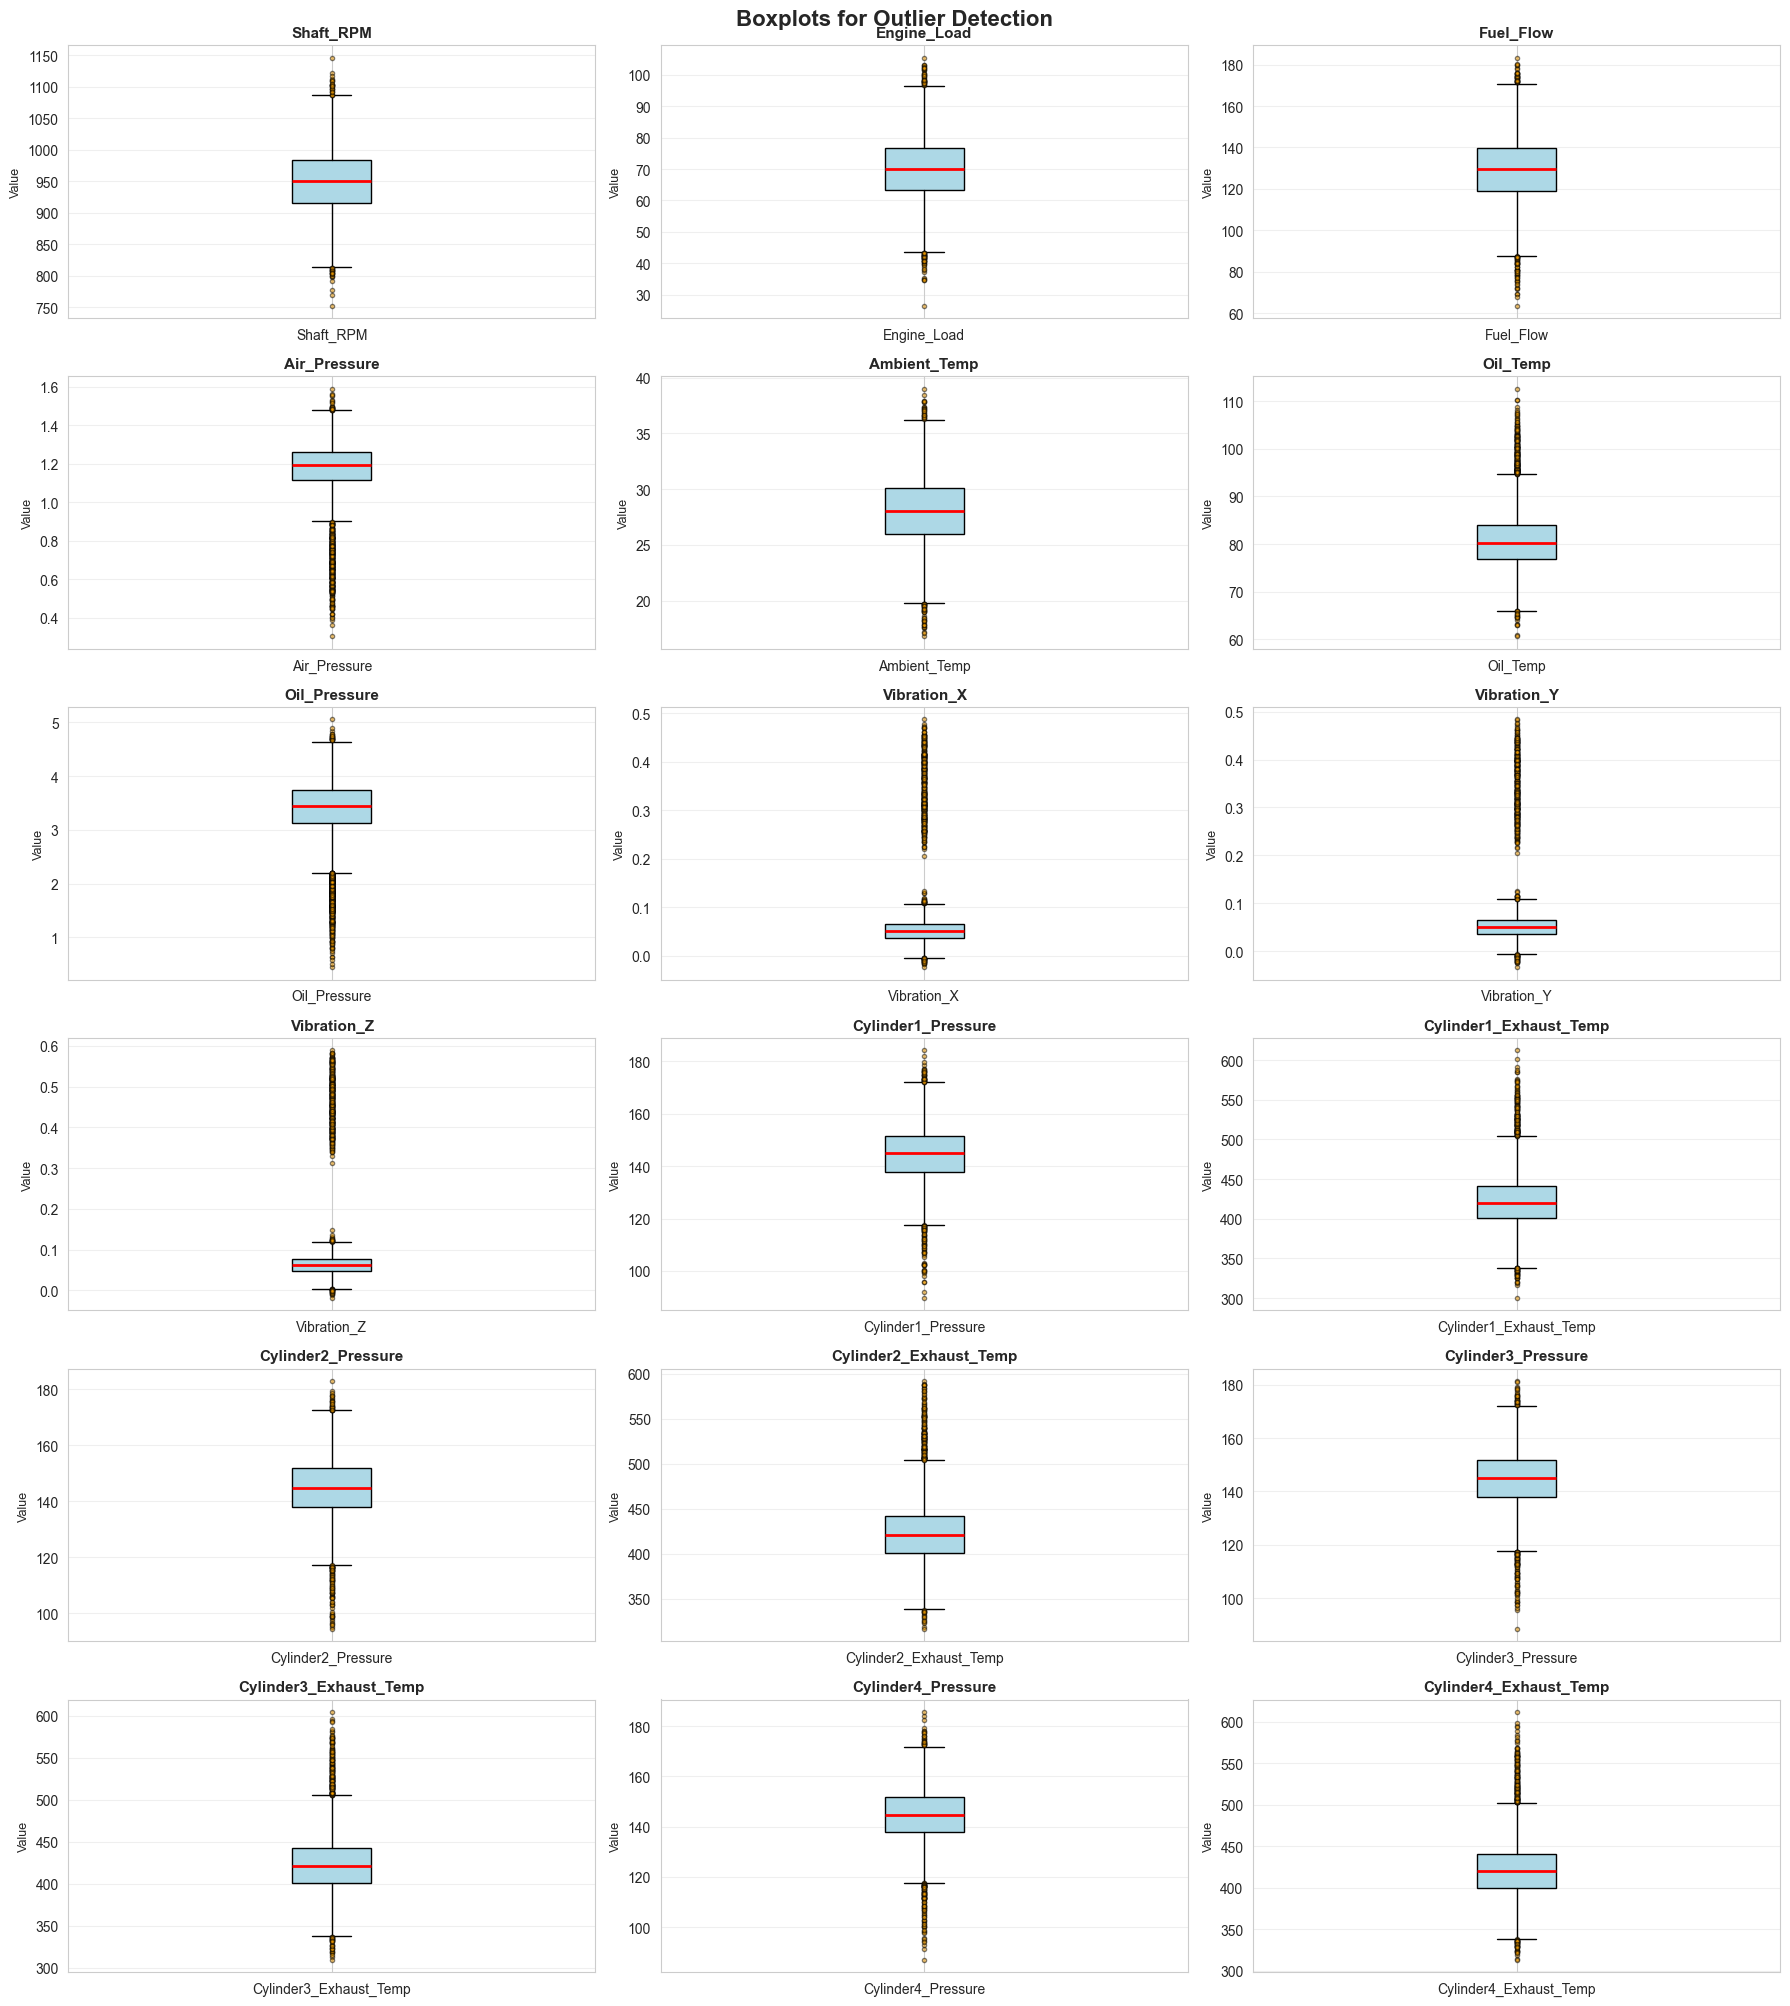

In [12]:
# Generate boxplots for all 18 sensor features
fig, axes = plt.subplots(6, 3, figsize=(18, 20))
axes = axes.flatten()

for idx, feature in enumerate(sensor_features):
    ax = axes[idx]
    df.boxplot(column=feature, ax=ax, patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='black'),
               medianprops=dict(color='red', linewidth=2),
               whiskerprops=dict(color='black'),
               capprops=dict(color='black'),
               flierprops=dict(marker='o', markerfacecolor='orange', markersize=3, alpha=0.5))
    ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Value', fontsize=9)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.suptitle('Boxplots for Outlier Detection', fontsize=16, fontweight='bold', y=1.001)
plt.show()

In [13]:
# Quantify outliers using IQR method
print("Outlier Analysis (IQR Method):")
print("=" * 80)

outlier_summary = []

for feature in sensor_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': feature,
        'Outlier Count': outlier_count,
        'Percentage': outlier_percent,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('Outlier Count', ascending=False)
print(outlier_df.to_string(index=False))

total_outliers = outlier_df['Outlier Count'].sum()
print(f"\nTotal outlier instances across all features: {total_outliers:,}")

Outlier Analysis (IQR Method):
               Feature  Outlier Count  Percentage  Lower Bound  Upper Bound
          Oil_Pressure            670        6.70     2.198753     4.654085
           Vibration_Z            538        5.38     0.004379     0.118887
          Air_Pressure            533        5.33     0.899490     1.478966
           Vibration_X            532        5.32    -0.004739     0.107691
           Vibration_Y            531        5.31    -0.006496     0.109149
              Oil_Temp            289        2.89    66.032320    94.724399
Cylinder1_Exhaust_Temp            232        2.32   338.136153   504.118117
Cylinder4_Exhaust_Temp            231        2.31   338.041038   502.650611
Cylinder2_Exhaust_Temp            224        2.24   338.326685   504.533887
Cylinder3_Exhaust_Temp            220        2.20   337.742460   505.439350
    Cylinder3_Pressure            131        1.31   117.503831   172.222296
    Cylinder4_Pressure            126        1.26   117.6

## 5. Correlation Analysis

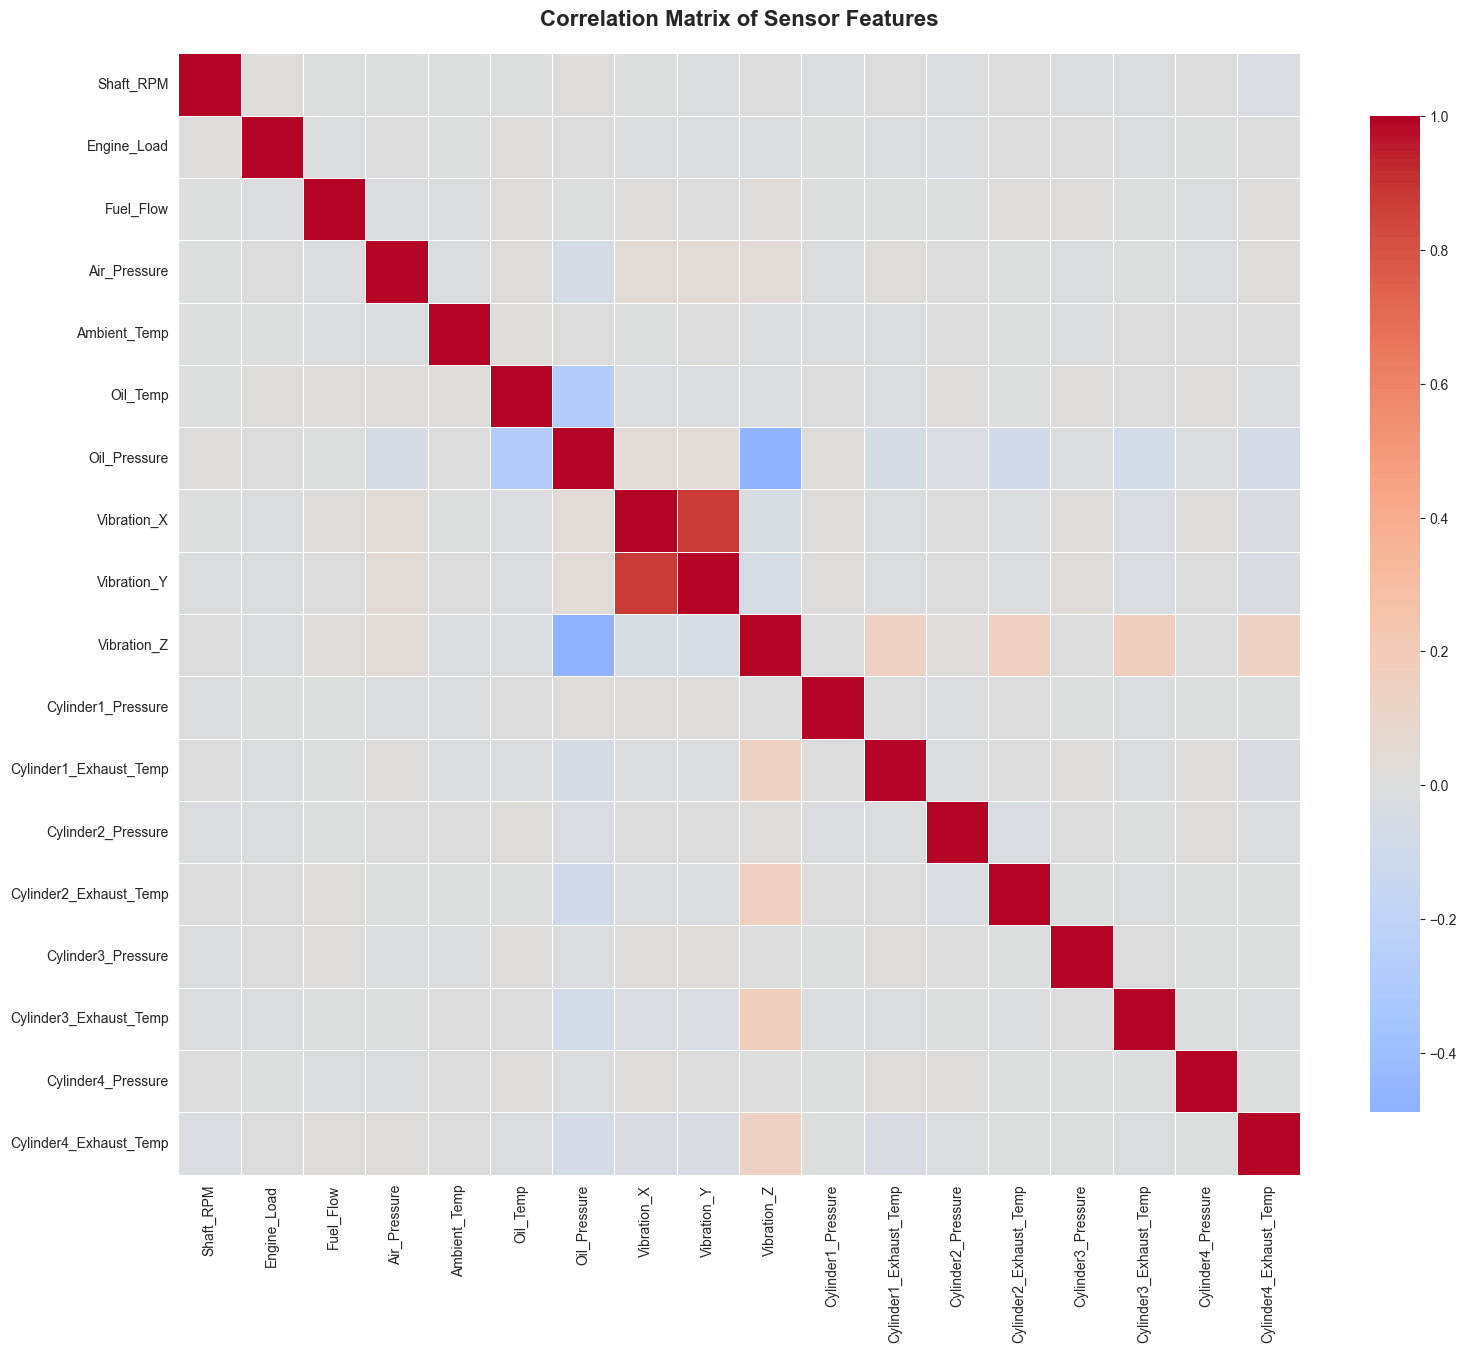


Highly Correlated Feature Pairs (|correlation| > 0.7):
  Feature 1   Feature 2  Correlation
Vibration_X Vibration_Y     0.876837


In [14]:
# Compute correlation matrix for sensor features
correlation_matrix = df[sensor_features].corr()

# Visualize correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Sensor Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify highly correlated feature pairs
print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
print("=" * 80)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values('Correlation', ascending=False, key=abs)
    print(high_corr_df.to_string(index=False))
else:
    print("No highly correlated feature pairs found.")

## 6. Data Cleaning Decisions

### Summary of Findings:

1. **Missing Values**: The dataset has no missing values, which is excellent for model training.

2. **Data Types**: All sensor features are numeric (float64), and Fault_Label is integer - appropriate for ML.

3. **Class Balance**: The fault label distribution shows whether classes are balanced or if stratified sampling is needed.

4. **Outliers**: Outliers detected using IQR method. These are likely legitimate extreme operating conditions rather than errors, so we will retain them.

5. **Feature Correlations**: Some cylinder measurements may be correlated, which is expected for similar engine components.

### Cleaning Decisions:

- **No data removal**: All records are valid with no missing values
- **Retain outliers**: Outliers represent real fault conditions and extreme operating states
- **Keep all features**: All 18 sensor features provide valuable information
- **Timestamp handling**: Will drop Timestamp column for modeling (not a predictive feature)
- **Stratified splitting**: Will use stratified train-test split to maintain class balance

### Next Steps:

The dataset is clean and ready for preprocessing. The next notebook will handle:
- Feature-target separation
- Train-test splitting (stratified)
- Feature scaling using StandardScaler
- Saving the preprocessor for deployment

In [15]:
# Final dataset info
print("Final Dataset Summary:")
print("=" * 80)
print(f"Total records: {len(df):,}")
print(f"Total features: {len(sensor_features)}")
print(f"Target classes: {df['Fault_Label'].nunique()}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"\n✓ Dataset is clean and ready for preprocessing!")

Final Dataset Summary:
Total records: 10,000
Total features: 18
Target classes: 8
Missing values: 0

✓ Dataset is clean and ready for preprocessing!


## 4. Sensor Feature Correlation Analysis

Analyzing correlations between sensor features to identify relationships and potential redundancies.

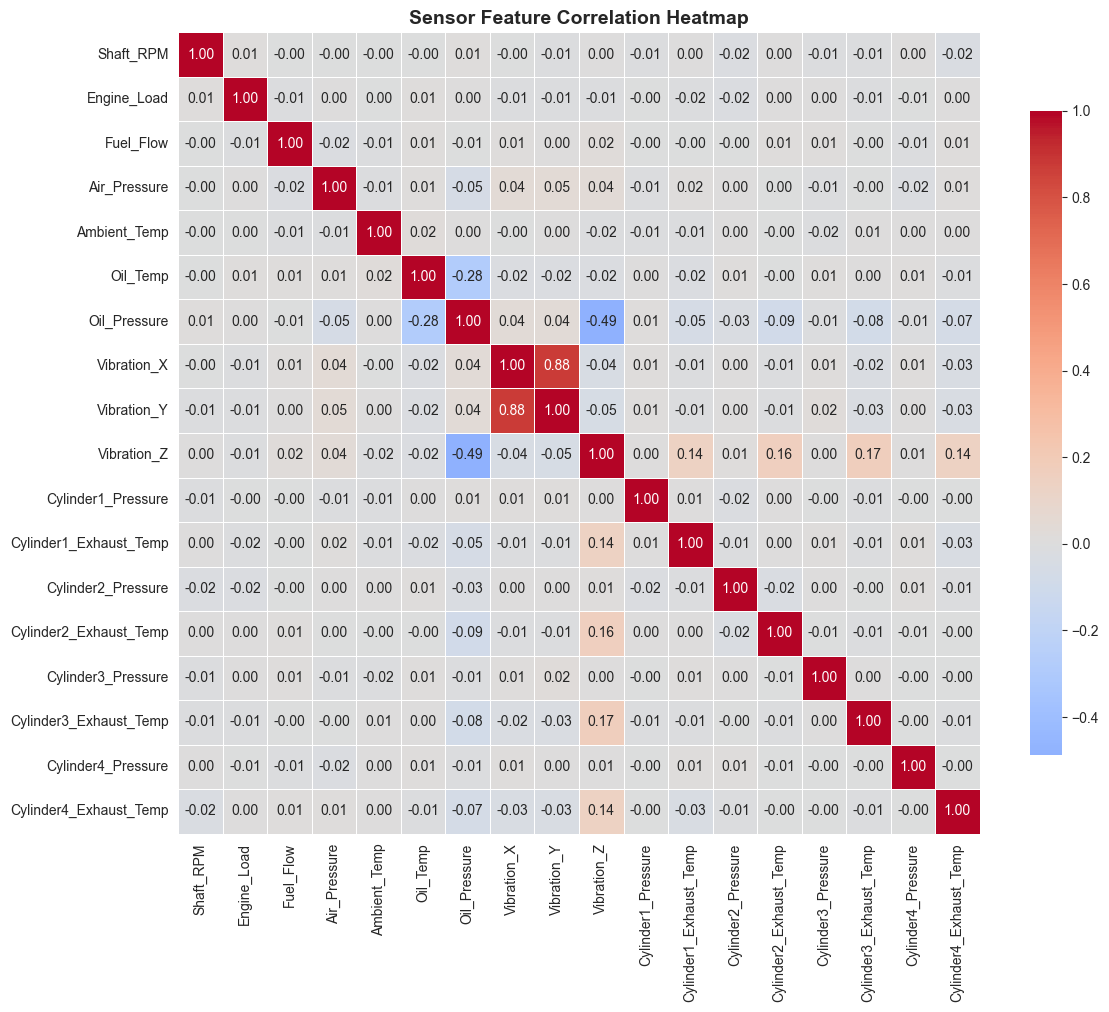


Highly Correlated Feature Pairs (|r| > 0.8):
Vibration_X <-> Vibration_Y: 0.877


In [16]:
# Extract sensor features for correlation analysis
sensor_features = ['Shaft_RPM', 'Engine_Load', 'Fuel_Flow', 'Air_Pressure', 'Ambient_Temp', 'Oil_Temp', 'Oil_Pressure', 'Vibration_X', 'Vibration_Y', 'Vibration_Z', 'Cylinder1_Pressure', 'Cylinder1_Exhaust_Temp', 'Cylinder2_Pressure', 'Cylinder2_Exhaust_Temp', 'Cylinder3_Pressure', 'Cylinder3_Exhaust_Temp', 'Cylinder4_Pressure', 'Cylinder4_Exhaust_Temp']

# Compute correlation matrix
correlation_matrix = df[sensor_features].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Sensor Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify highly correlated features (|r| > 0.8)
print('\nHighly Correlated Feature Pairs (|r| > 0.8):')
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f'{feat1} <-> {feat2}: {corr_val:.3f}')
else:
    print('No feature pairs with |r| > 0.8 found.')

### Correlation Insights

The correlation heatmap reveals relationships between sensor features:
- **Strong positive correlations** indicate features that tend to increase together
- **Strong negative correlations** indicate inverse relationships
- **Weak correlations** suggest independent sensor measurements

Highly correlated features (|r| > 0.8) may indicate redundancy or strong physical relationships in the engine system.

## 5. Feature Distribution Analysis

Analyzing distributions of key sensor features to understand normal vs fault conditions.

In [17]:
# Select top 5 most variable sensors for distribution analysis
# Using coefficient of variation (std/mean) to identify most informative features
sensor_features = ['Shaft_RPM', 'Engine_Load', 'Fuel_Flow', 'Air_Pressure', 'Ambient_Temp',
                   'Oil_Temp', 'Oil_Pressure', 'Vibration_X', 'Vibration_Y', 'Vibration_Z',
                   'Cylinder1_Pressure', 'Cylinder1_Exhaust_Temp', 'Cylinder2_Pressure',
                   'Cylinder2_Exhaust_Temp', 'Cylinder3_Pressure', 'Cylinder3_Exhaust_Temp',
                   'Cylinder4_Pressure', 'Cylinder4_Exhaust_Temp']

# Calculate coefficient of variation for each sensor
cv_scores = {}
for feature in sensor_features:
    mean_val = df[feature].mean()
    std_val = df[feature].std()
    cv_scores[feature] = std_val / mean_val if mean_val != 0 else 0

# Get top 5 sensors with highest variation
top_5_sensors = sorted(cv_scores.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_features = [sensor[0] for sensor in top_5_sensors]

print('Top 5 Most Variable Sensors:')
for sensor, cv in top_5_sensors:
    print(f'{sensor}: CV = {cv:.4f}')

Top 5 Most Variable Sensors:
Vibration_Z: CV = 1.1342
Vibration_X: CV = 1.0581
Vibration_Y: CV = 1.0500
Oil_Pressure: CV = 0.1827
Engine_Load: CV = 0.1429


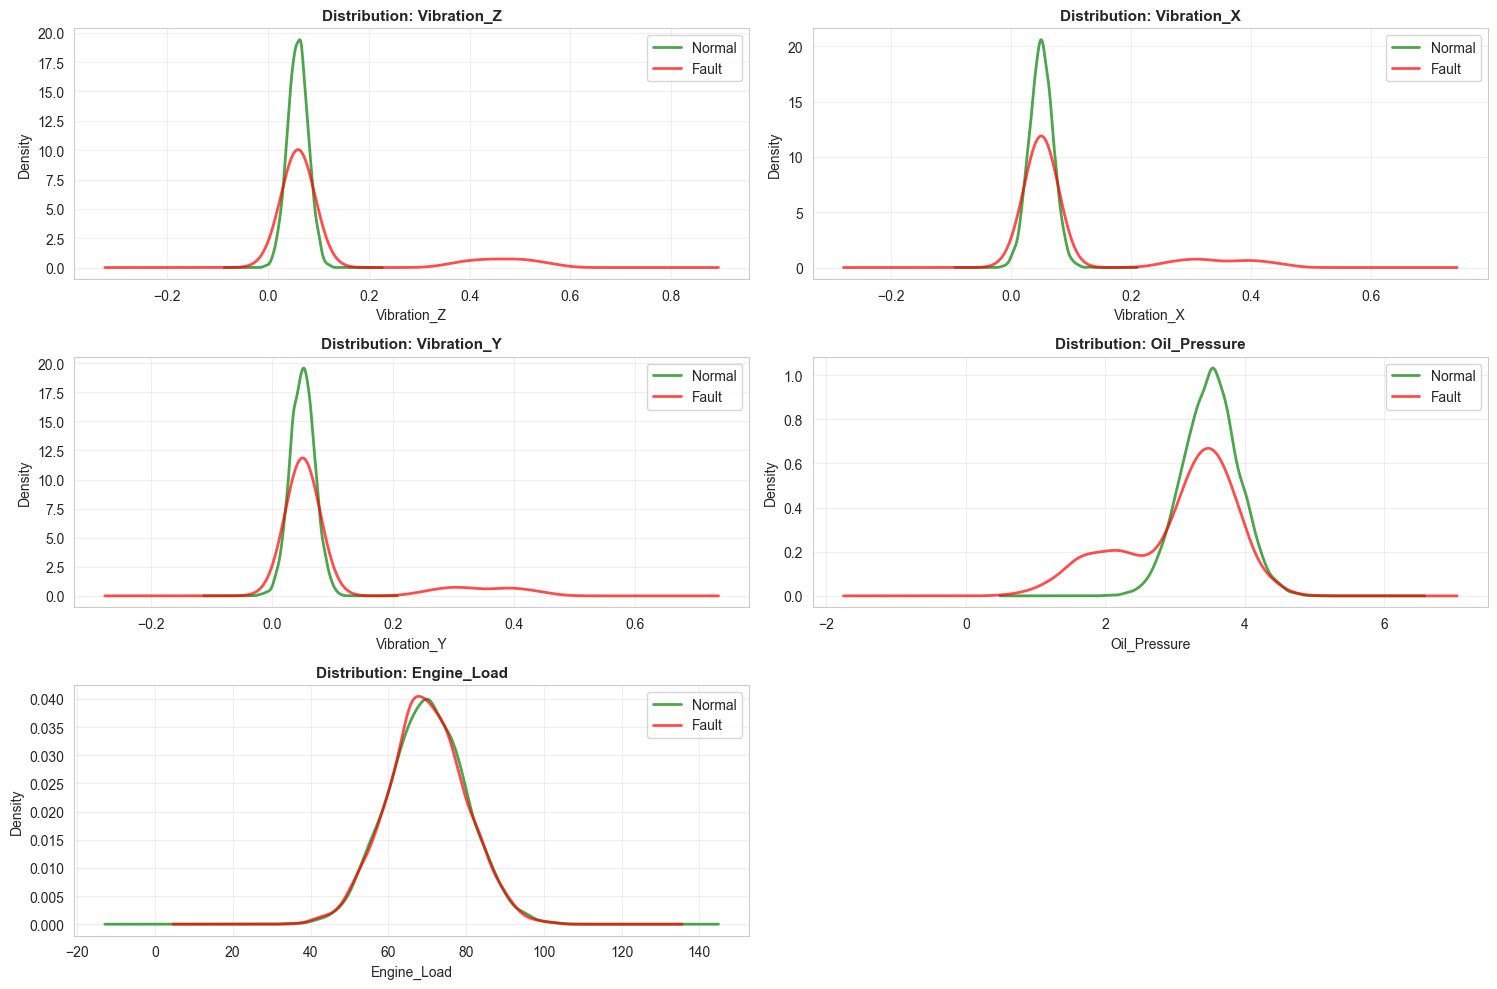

In [18]:
# Create distribution plots for top 5 sensors
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

# Separate normal and fault conditions
normal_data = df[df['Fault_Label'] == 0]
fault_data = df[df['Fault_Label'] != 0]

for idx, feature in enumerate(top_5_features):
    ax = axes[idx]
    
    # Plot KDE for normal conditions
    normal_data[feature].plot(kind='kde', ax=ax, label='Normal', 
                               color='green', linewidth=2, alpha=0.7)
    
    # Plot KDE for fault conditions
    fault_data[feature].plot(kind='kde', ax=ax, label='Fault', 
                              color='red', linewidth=2, alpha=0.7)
    
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.set_title(f'Distribution: {feature}', fontsize=11, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

### Distribution Analysis Findings

The KDE plots compare sensor distributions between normal and fault conditions:
- **Overlapping distributions** suggest the sensor alone may not distinguish faults
- **Separated distributions** indicate strong discriminative power for fault detection
- **Multimodal distributions** may indicate different fault types affecting the sensor differently

These insights help understand which sensors are most informative for fault prediction.

## 6. Outlier Detection Summary

Using the Interquartile Range (IQR) method to identify potential outliers in sensor features.

In [19]:
# Define sensor features for outlier detection
sensor_features = ['Shaft_RPM', 'Engine_Load', 'Fuel_Flow', 'Air_Pressure', 'Ambient_Temp',
                   'Oil_Temp', 'Oil_Pressure', 'Vibration_X', 'Vibration_Y', 'Vibration_Z',
                   'Cylinder1_Pressure', 'Cylinder1_Exhaust_Temp', 'Cylinder2_Pressure',
                   'Cylinder2_Exhaust_Temp', 'Cylinder3_Pressure', 'Cylinder3_Exhaust_Temp',
                   'Cylinder4_Pressure', 'Cylinder4_Exhaust_Temp']

# Calculate outliers using IQR method
outlier_summary = []

for feature in sensor_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': feature,
        'Outlier_Count': outlier_count,
        'Percentage': outlier_percentage,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound
    })

# Create summary DataFrame
outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('Outlier_Count', ascending=False)

print('Outlier Detection Summary (IQR Method):')
print('=' * 80)
print(outlier_df[['Feature', 'Outlier_Count', 'Percentage']].to_string(index=False))
print('\nTotal outliers across all features:', outlier_df['Outlier_Count'].sum())

Outlier Detection Summary (IQR Method):
               Feature  Outlier_Count  Percentage
          Oil_Pressure            670        6.70
           Vibration_Z            538        5.38
          Air_Pressure            533        5.33
           Vibration_X            532        5.32
           Vibration_Y            531        5.31
              Oil_Temp            289        2.89
Cylinder1_Exhaust_Temp            232        2.32
Cylinder4_Exhaust_Temp            231        2.31
Cylinder2_Exhaust_Temp            224        2.24
Cylinder3_Exhaust_Temp            220        2.20
    Cylinder3_Pressure            131        1.31
    Cylinder4_Pressure            126        1.26
    Cylinder2_Pressure            120        1.20
    Cylinder1_Pressure            113        1.13
             Fuel_Flow             92        0.92
           Engine_Load             80        0.80
          Ambient_Temp             65        0.65
             Shaft_RPM             47        0.47

Total out

### Outlier Analysis Insights

The IQR method identifies data points that fall outside 1.5 × IQR from the quartiles:
- **High outlier counts** may indicate sensor anomalies or fault conditions
- **Low outlier counts** suggest stable sensor measurements
- Outliers are expected in fault detection datasets as they often represent abnormal engine states

These outliers will be preserved for model training as they contain valuable fault information.